# Load data

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [98]:
data=pd.read_csv("crx.data",header=None)

data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


# Inspecting data

The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

In [100]:
data.columns = ["Gender", "Age", "Debt", 
            "Married", "BankCustomer", 
            "EducationLevel", "Ethnicity", 
            "YearsEmployed", "PriorDefault", 
            "Employed", "CreditScore",
             "DriversLicense", "Citizen", 
             "ZipCode", "Income", "ApprovalStatus"]

In [104]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [101]:
data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [103]:
data.shape

(690, 16)

# Handling Missing values

The dataset has missing values, which are labeled with '?', 

In [105]:
data.replace("?",pd.NA,inplace=True)

data.isna().values.sum()

67

In [106]:
data.fillna(data.mean(), inplace=True)

data.isna().values.sum()


67

In [107]:
for col in data:
    if data[col].dtypes=='object':
        data.fillna(data[col].mode()[0],inplace=True)

data.isna().values.sum()

0

# Preprocessing data

Label Encoding

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data:
    if data[col].dtypes=='object':
        data[col]=le.fit_transform(data[col])
        

In [109]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


Feature Scaling

Features Gender,Ethnicity, DriversLicense & Zipcode are not important

In [111]:
data=data.drop(['Gender','Ethnicity','DriversLicense','ZipCode'],axis=1)

In [112]:
data.head()

,Age,Debt,Married,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,156,0.000,2,1,13,1.25,1,1,1,0,0,0
1,328,4.460,2,1,11,3.04,1,1,6,0,560,0
2,89,0.500,2,1,11,1.50,1,0,0,0,824,0
3,125,1.540,2,1,13,3.75,1,1,5,0,3,0
4,43,5.625,2,1,13,1.71,1,0,0,2,0,0


Split the dataset into train and test sets

In [129]:
from sklearn.model_selection import train_test_split

X=data.iloc[:,0:11]
y=data.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

Scaling/Normalization

In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

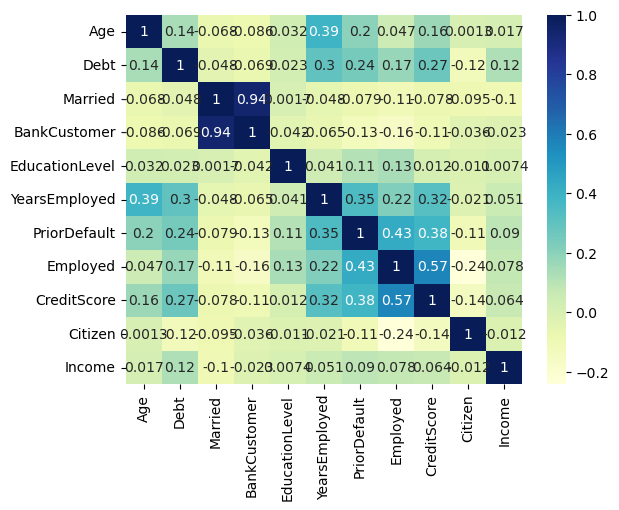

In [131]:
import seaborn as sns

sns.heatmap(data=X.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Model Training

In [134]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train_scaled,y_train)

LogisticRegression()

# Model Evaluation

In [135]:
ypred=logreg.predict(X_test_scaled)

print(logreg.score(X_test_scaled,y_test))

0.8377192982456141


Making the model perform better

In [147]:
from sklearn.model_selection import GridSearchCV

#tol = [0.01, 0.001, 0.0001]
#max_iter = [100, 150, 200]

#param_grid = dict(tol=tol, max_iter=max_iter)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

grid_search1 = GridSearchCV(logreg, param_grid, cv=5)
grid_search1.fit(X_train_scaled, y_train)

print('Parameters : ', grid_search1.best_params_,'\nAccuracy Score : ', grid_search1.best_score_)

Parameters :  {'C': 1, 'penalty': 'l2'} 
Accuracy Score :  0.8636278634876111
